# Food Truck Jupyter Notebook

### The goal of this program is to give you a dataframe of 5 of the closest food trucks based on the address you input. Also, it will give you a street map that will show you your relative location, and where the food trucks are located on the map. 

*note the scope of this project is for San Francisco California  

In [4]:
import time
import googlemaps 
import pandas as pd 
import matplotlib.pyplot as plt 
import descartes 
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline


/Users/abayomiolorunfemi/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


# Part 1

### You need an API from https://developers.google.com/maps its free 

In [5]:
API_KEY = '' #initialize API KEY TO PASS INTO CLIENT
map_client = googlemaps.Client(API_KEY)


#### Need a helper function to convert miles to meters. Since the API args require meters.


In [6]:

def miles_to_meters(miles): # need to convert miles to meters 
    try:
        return miles * 1_609.344 #
    except:
        return 0

In [7]:
search_string = input("Enter keyword to search(Food Truck):") #google API takes a search string 
distance = miles_to_meters(2) # want to do in a 2 mile radius so we convert the miles to meters from the helper function
food_trucks = [] # empty list, we are going to put our list of food trucks in this list
address = input("Enter address:")

Enter keyword to search(Food Truck):Food Trucks
Enter address:1696 Palou Ave, San Francisco, CA 94124


In [8]:
geocode = map_client.geocode(address=address) #using geo code to extract the long, and lat from the address 
(lat, lng) = map(geocode[0]['geometry']['location'].get, ('lat', 'lng'))

#### The results in the response is stored in the Food Truck list and we convert the list to a dataframe 

In [9]:
response = map_client.places_nearby(
    location=(lat, lng),
    keyword=search_string,
    radius=distance
)   

food_trucks.extend(response.get('results'))  

df = pd.DataFrame(food_trucks)

In [10]:
df

,business_status,geometry,icon,icon_background_color,icon_mask_base_uri,name,opening_hours,photos,place_id,plus_code,rating,reference,scope,types,user_ratings_total,vicinity,permanently_closed,price_level
0,OPERATIONAL,"{'location': {'lat': 37.7639201, 'lng': -122.3...",https://maps.gstatic.com/mapfiles/place_api/ic...,#FF9E67,https://maps.gstatic.com/mapfiles/place_api/ic...,Street Meet Taco Truck,{'open_now': False},"[{'height': 3024, 'html_attributions': ['<a hr...",ChIJof6iMyl_j4ARueWFLcxGae4,"{'compound_code': 'QJ75+HF Dogpatch, San Franc...",4.9,ChIJof6iMyl_j4ARueWFLcxGae4,GOOGLE,"[restaurant, point_of_interest, food, establis...",7,"777 Mariposa St, San Francisco",NaN,NaN
1,CLOSED_TEMPORARILY,"{'location': {'lat': 37.7615062, 'lng': -122.4...",https://maps.gstatic.com/mapfiles/place_api/ic...,#FF9E67,https://maps.gstatic.com/mapfiles/place_api/ic...,Vegan Mob Food Truck - Vegan BBQ & Soulfood,NaN,"[{'height': 4032, 'html_attributions': ['<a hr...",ChIJT1O9Z95_j4ARp-bgw7I0T5k,"{'compound_code': 'QH6H+JG Mission District, S...",4.3,ChIJT1O9Z95_j4ARp-bgw7I0T5k,GOOGLE,"[restaurant, point_of_interest, food, establis...",41,"701 Valencia St, San Francisco",True,2.0
2,OPERATIONAL,"{'location': {'lat': 37.7402616, 'lng': -122.4...",https://maps.gstatic.com/mapfiles/place_api/ic...,#7B9EB0,https://maps.gstatic.com/mapfiles/place_api/ic...,San Pancho's Tacos,NaN,"[{'height': 4032, 'html_attributions': ['<a hr...",ChIJoxh9zFV-j4ARbFTHh7m4Wbo,"{'compound_code': 'PHRV+4H Apparel City, San F...",4.2,ChIJoxh9zFV-j4ARbFTHh7m4Wbo,GOOGLE,"[restaurant, point_of_interest, food, establis...",18,"Outside Lowe’s, 491 Bayshore Blvd, San Francisco",NaN,NaN
3,OPERATIONAL,"{'location': {'lat': 37.7634446, 'lng': -122.4...",https://maps.gstatic.com/mapfiles/place_api/ic...,#FF9E67,https://maps.gstatic.com/mapfiles/place_api/ic...,Mora Taco Truck,{'open_now': False},"[{'height': 3264, 'html_attributions': ['<a hr...",ChIJ1Y6jTy9_j4ARSY0BoRM2A3k,"{'compound_code': 'QH7J+95 Mission District, S...",4.6,ChIJ1Y6jTy9_j4ARSY0BoRM2A3k,GOOGLE,"[restaurant, point_of_interest, food, establis...",9,"17th St, San Francisco",NaN,NaN
4,OPERATIONAL,"{'location': {'lat': 37.72598139999999, 'lng':...",https://maps.gstatic.com/mapfiles/place_api/ic...,#FF9E67,https://maps.gstatic.com/mapfiles/place_api/ic...,El Primo Taco Truck,{'open_now': False},"[{'height': 3456, 'html_attributions': ['<a hr...",ChIJeVIohBd_j4ARAfnFnmSSpwQ,"{'compound_code': 'PJG6+93 Bayview, San Franci...",4.3,ChIJeVIohBd_j4ARAfnFnmSSpwQ,GOOGLE,"[restaurant, point_of_interest, food, establis...",117,"2200-2298 Jennings St, San Francisco",NaN,1.0
5,OPERATIONAL,"{'location': {'lat': 37.7543291, 'lng': -122.4...",https://maps.gstatic.com/mapfiles/place_api/ic...,#FF9E67,https://maps.gstatic.com/mapfiles/place_api/ic...,El Gallo Giro,{'open_now': False},"[{'height': 3024, 'html_attributions': ['<a hr...",ChIJc7uXRlp_j4AR7_OWyHpwgyw,"{'compound_code': 'QH3P+PQ Mission District, S...",4.8,ChIJc7uXRlp_j4AR7_OWyHpwgyw,GOOGLE,"[restaurant, point_of_interest, food, establis...",87,"986-998 Treat Ave, San Francisco",NaN,NaN
6,OPERATIONAL,"{'location': {'lat': 37.7400714, 'lng': -122.3...",https://maps.gstatic.com/mapfiles/place_api/ic...,#FF9E67,https://maps.gstatic.com/mapfiles/place_api/ic...,Rodriguez Taco Truck,{'open_now': False},"[{'height': 3984, 'html_attributions': ['<a hr...",ChIJb0ygjgx_j4ARh6a6AVy4DMg,"{'compound_code': 'PJR9+2G India Basin, San Fr...",4.0,ChIJb0ygjgx_j4ARh6a6AVy4DMg,GOOGLE,"[restaurant, point_of_interest, food, establis...",4,"1200-1300 Evans Ave, San Francisco",NaN,NaN
7,OPERATIONAL,"{'location': {'lat': 37.7419264, 'lng': -122.4...",https://maps.gstatic.com/mapfiles/place_api/ic...,#FF9E67,https://maps.gstatic.com/mapfiles/place_api/ic...,The Chairman,{'open_now': False},"[{'height': 3024, 'html_attributions': ['<a hr...",ChIJTfvr2pCAhYARWBE4p5-ZHTk,"{'compound_code': 'PHRW+QG Apparel City, San F...",4.4,ChIJTfvr2pCAhYARWBE4p5-ZHTk,GOOGLE,"[meal_takeaway, restaurant, point_of

#### Want to drop unneccessary columns we dont really care for below

In [11]:
food_trucks_2= df.loc[:,['name','vicinity','rating','opening_hours','geometry']]

In [12]:
food_trucks_2[0:5] #displays top 5 closest food trucks 

,name,vicinity,rating,opening_hours,geometry
0,Street Meet Taco Truck,"777 Mariposa St, San Francisco",4.9,{'open_now': False},"{'location': {'lat': 37.7639201, 'lng': -122.3..."
1,Vegan Mob Food Truck - Vegan BBQ & Soulfood,"701 Valencia St, San Francisco",4.3,NaN,"{'location': {'lat': 37.7615062, 'lng': -122.4..."
2,San Pancho's Tacos,"Outside Lowe’s, 491 Bayshore Blvd, San Francisco",4.2,NaN,"{'location': {'lat': 37.7402616, 'lng': -122.4..."
3,Mora Taco Truck,"17th St, San Francisco",4.6,{'open_now': False},"{'location': {'lat': 37.7634446, 'lng': -122.4..."
4,El Primo Taco Truck,"2200-2298 Jennings St, San Francisco",4.3,{'open_now': False},"{'location': {'lat': 37.72598139999999, 'lng':..."


# Part 2- Generating Street Map

### To be able to plot our points we will need to make our street map, so we will need Matplotlib and geopandas. You will need a SHP File of San Francisco. This project is for San Francisco soely. We will need to make a geo dataframe for OUR address and the Food Truck Dataframe we made earlier and plot the long and lat.

In [15]:
lat_long_extraction=food_trucks_2["geometry"].apply(pd.Series) # this will breakdown the geometry column from our food truck df to give us lat and long 
lat_long_extraction_2=lat_long_extraction.loc[:,['location']] #isolate the location column ex:{'lat': 37.7634446, 'lng': -122.4..}
lat_long_extraction_3 = lat_long_extraction_2['location'].apply(pd.Series) #we want to have lat and long to have its own seperate column

In [16]:
lat_long_extraction_3

,lat,lng
0,37.763920,-122.390957
1,37.761506,-122.421212
2,37.740262,-122.406081
3,37.763445,-122.419542
4,37.725981,-122.389813


#### We will need to get the SHP file of San Francisco. This will be attached to the project. 

In [18]:
street_map = gpd.read_file('/Users/abayomiolorunfemi/Downloads/kx-city-of-san-francisco-california-streets-SHP (1)')
#street_map = gpd.read_file('/Users/abayomiolorunfemi/Downloads/kx-city-of-san-francisco-california-streets-SHP (1)')

#### Below you will see the street map. Notice the latitude and longitude on the x and y axis if it doesnt have the range you need, you may have downloaded the wrong SHP make sure the CORS is right. 

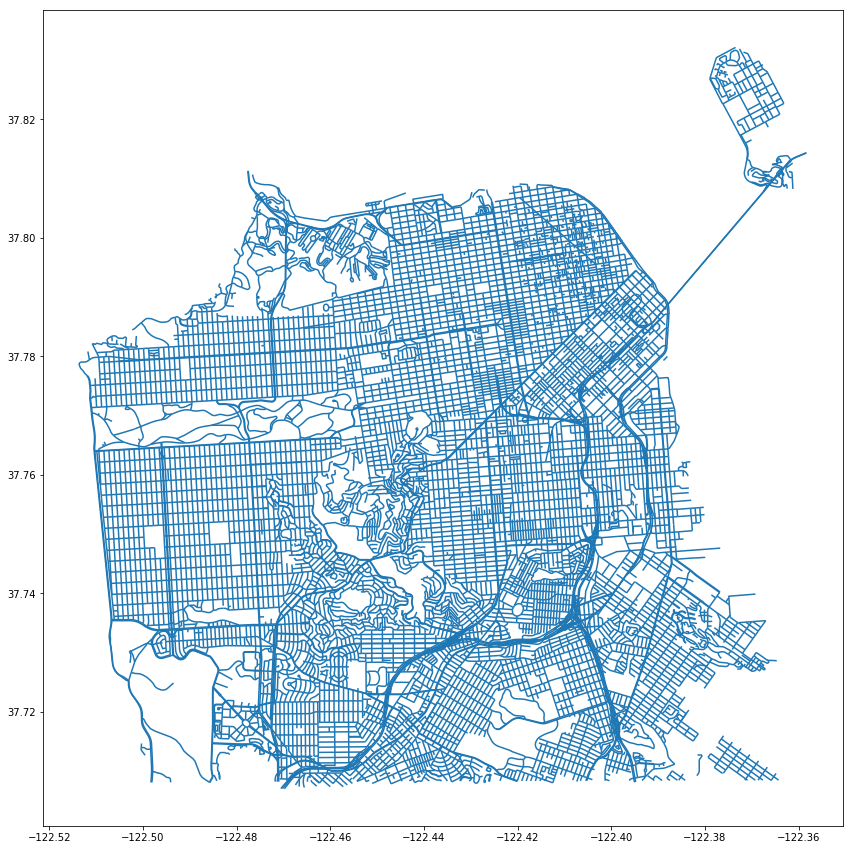

In [19]:
fig,ax = plt.subplots(figsize=(15,15)) 
street_map.plot(ax = ax) #this plots our map notice the latitude and longitude on the x and y axis 


#### To be successful we need make the lng and lat into a Point(xy) for geopandas 

In [18]:
geometry = [Point(xy) for xy in zip (lat_long_extraction_3["lng"], lat_long_extraction_3["lat"])]
geometry[:3]


#### Converting our address in the beginning to a geo dataframe and redoing the process to create points (lat,long) for our address

In [19]:
new_geocode_df = pd.DataFrame(geocode) #geocode is where we stored our address conversion in the beginning 
extraction = new_geocode_df["geometry"].apply(pd.Series)
extraction_location = extraction["location"].apply(pd.Series)
geometry_2 = [Point(xy) for xy in zip (extraction_location["lng"], extraction_location["lat"])]
geometry_2 

In [20]:
geo_df = gpd.GeoDataFrame(food_trucks_2,
                         geometry = geometry)
geo_df_2 = gpd.GeoDataFrame(new_geocode_df,
                         geometry = geometry_2)

In [21]:
geo_df_2

,address_components,formatted_address,geometry,place_id,types
0,"[{'long_name': '1696', 'short_name': '1696', '...","1696 Palou Ave, San Francisco, CA 94124, USA",POINT (-122.39254 37.73511),ChIJq5_lqQV_j4ARTCCIl6j_fkA,[premise]


In [22]:
geo_df

,name,vicinity,rating,opening_hours,geometry
0,Street Meet Taco Truck,"777 Mariposa St, San Francisco",4.9,{'open_now': False},POINT (-122.39096 37.76392)
1,Vegan Mob Food Truck - Vegan BBQ & Soulfood,"701 Valencia St, San Francisco",4.3,NaN,POINT (-122.42121 37.76151)
2,San Pancho's Tacos,"Outside Lowe’s, 491 Bayshore Blvd, San Francisco",4.2,NaN,POINT (-122.40608 37.74026)
3,Mora Taco Truck,"17th St, San Francisco",4.6,{'open_now': False},POINT (-122.41954 37.76344)
4,El Primo Taco Truck,"2200-2298 Jennings St, San Francisco",4.3,{'open_now': False},POINT (-122.38981 37.72598)


#### We plot our points! 

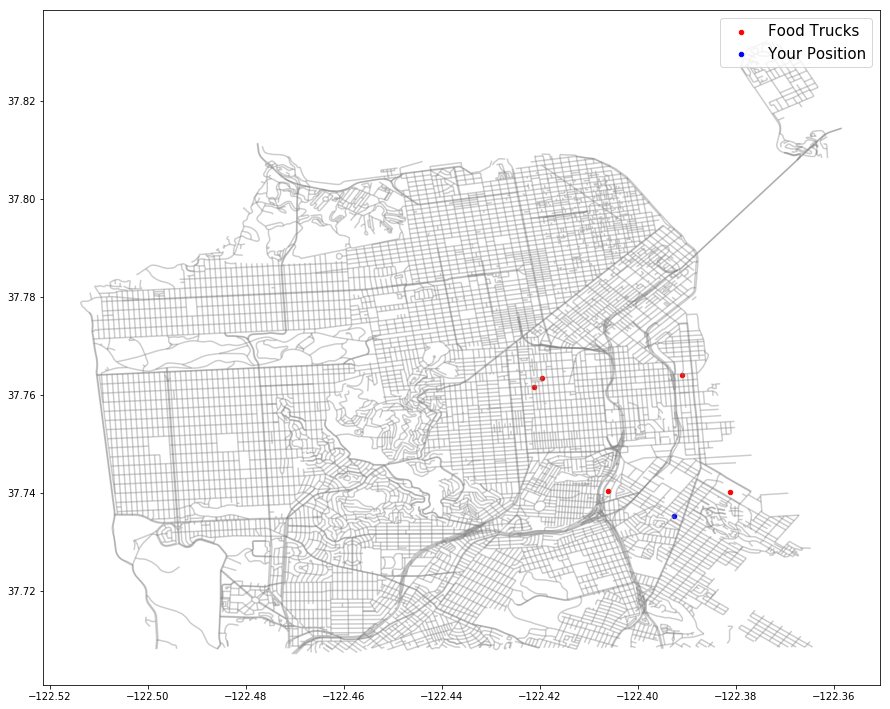

In [26]:
fig,ax = plt.subplots(figsize = (15,15))
street_map.plot(ax =ax, alpha =0.4, color="grey")
geo_df.plot(ax=ax, marker='o', color='red', markersize=20, label="Food Trucks")
geo_df_2.plot(ax=ax, marker='o', color='blue', markersize=20, label= "Your Position")
plt.legend(prop={'size': 15})
